# TP SVM     Maxime Kubryk

In [1]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
import numpy as np
from sklearn.datasets import fetch_lfw_people
from time import time
import matplotlib.pyplot as plt
from sklearn.decomposition import RandomizedPCA

%matplotlib inline

#### Question 1

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

print len(X), len(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print len(X_train),len(X_test)

In [ ]:
# avec un noyau linéaire :
clf = SVC(kernel = 'linear', C=1.)
clf.fit(X_train, y_train)

print "noyau linéaire, accuracy score :", clf.score(X_test, y_test)

#### Question 2

In [ ]:
# avec un noyau polynomial :
clf = SVC(kernel = 'poly', degree=3, C=1.)
clf.fit(X_train, y_train)

print "noyau polynomial de degrés 3, accuracy score :", clf.score(X_test, y_test)

#### Question 3

#### Question 4

### Données pour les questions suivantes

In [2]:
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None)  
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()


In [3]:
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
#names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

In [4]:
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

In [5]:
# Split data into a half training and half test set
#X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]


In [6]:
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [7]:
def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

#### Question 5

In [8]:
# valeurs de C qui seront testées :
C_values = np.logspace(-5, 5, 30)


def C_testing(X_train, X_test, y_train, y_test, C_values, kernel='linear'):
    """
    Test des valeurs de C données dans C_values
    """
    scores = []

    for c in C_values:
    
        clf = SVC(kernel=kernel, C=c)
        clf = clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
    
        scores.append(clf.score(X_test, y_test))
    
        print "%5.3e, %5.3f"%(c, scores[-1])
        
    return scores

In [9]:
scores = C_testing(X_train, X_test, y_train, y_test, C_values)

1.000e-05, 0.626
2.212e-05, 0.674
4.894e-05, 0.800
1.083e-04, 0.868
2.395e-04, 0.884
5.298e-04, 0.884
1.172e-03, 0.900
2.593e-03, 0.900
5.736e-03, 0.900
1.269e-02, 0.900
2.807e-02, 0.900
6.210e-02, 0.900
1.374e-01, 0.900
3.039e-01, 0.900
6.723e-01, 0.900
1.487e+00, 0.900
3.290e+00, 0.900
7.279e+00, 0.900
1.610e+01, 0.900
3.562e+01, 0.900
7.880e+01, 0.900
1.743e+02, 0.900
3.857e+02, 0.900
8.532e+02, 0.900
1.887e+03, 0.900
4.175e+03, 0.900
9.237e+03, 0.900
2.043e+04, 0.900
4.520e+04, 0.900
1.000e+05, 0.900


score max :  0.9


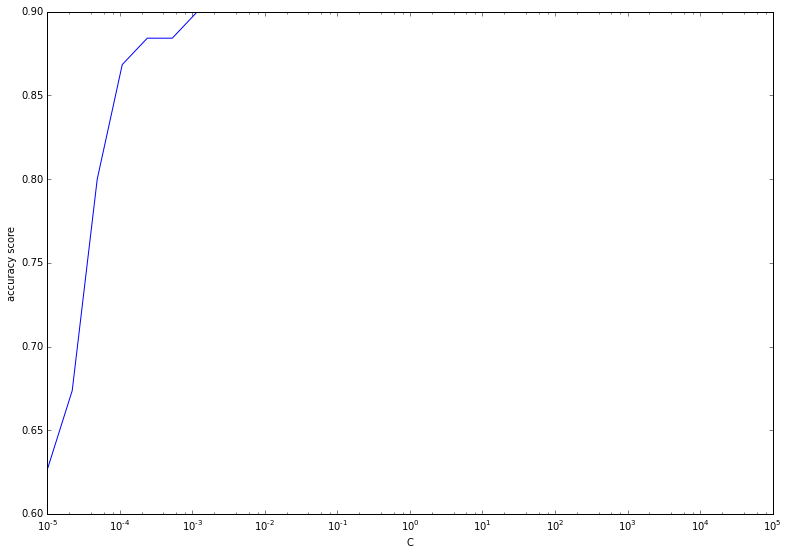

In [10]:
print "score max : ", max(scores)

plt.figure(figsize=(13,9))
plt.semilogx(C_values, scores)
plt.xlabel('C')
plt.ylabel('accuracy score')

#### Question 6

In [11]:
# fonction pour ajouter n colonnes de bruits dans un array :
def add_noise(array, ncols=3):
    a = np.random.rand(len(array),ncols)*2. -1.  # valeurs entre -1 and 1
    array = np.append(array, a, axis=1)
    return array

In [ ]:
# Pour la meilleur valeur de C,
# On va tester le score de la SVM en ajoutant des colunnes de bruits.
# On garde C=1e-3 qui est bonne valeur pour le paramètre de régularisation, d'après les résultats précédents.

N_noisy_max = 30 # number of iterations
N_noisy_step = 500 # number of random columns added at each step

X_train_noisy = X_train
X_test_noisy = X_test


scores = [] # scores
n_cols = [] # number of random columns
for i in range(N_noisy_max):
    
    X_train_noisy = add_noise(X_train_noisy, ncols=N_noisy_step)
    X_test_noisy = add_noise(X_test_noisy, ncols=N_noisy_step)
    
    clf = SVC(kernel='linear', C=1e-3)
    clf = clf.fit(X_train_noisy, y_train)

    y_pred = clf.predict(X_test_noisy)
    
    scores.append(clf.score(X_test_noisy, y_test))
    
    if i==0:
        n_cols = [0]
    else:
        n_cols.append(n_cols[-1] + N_noisy_step)
    
    
    print "%5.1f, %5.3f"%(n_cols[-1], scores[-1])

In [ ]:
print(len(scores), len(n_cols))

plt.figure(figsize=(13,9))
plt.plot(n_cols, scores)
plt.xlabel("number of random columns")
plt.ylabel('accuracy score')

Il faut ajouter un grand nombre de variables random pour voir une diminution nette de la performance de l'algorithme.

#### Question 7

On centre et réduit les données d'une part pour les regrouper autour de l'origine, ce qui permet de mettre le biais $\omega_0$ à 0, et d'autre part pour rendre les variables explicatives comparables.

#### Question 8

In [12]:
scores = C_testing(X_train, X_test, y_train, y_test, C_values, kernel='rbf')

1.000e-05, 0.626
2.212e-05, 0.626
4.894e-05, 0.626
1.083e-04, 0.626
2.395e-04, 0.626
5.298e-04, 0.626
1.172e-03, 0.626
2.593e-03, 0.626
5.736e-03, 0.626
1.269e-02, 0.626
2.807e-02, 0.626
6.210e-02, 0.626
1.374e-01, 0.626
3.039e-01, 0.626
6.723e-01, 0.747
1.487e+00, 0.842
3.290e+00, 0.847
7.279e+00, 0.842
1.610e+01, 0.842
3.562e+01, 0.842
7.880e+01, 0.842
1.743e+02, 0.842
3.857e+02, 0.842
8.532e+02, 0.842
1.887e+03, 0.842
4.175e+03, 0.842
9.237e+03, 0.842
2.043e+04, 0.842
4.520e+04, 0.842
1.000e+05, 0.842


score max :  0.847368421053


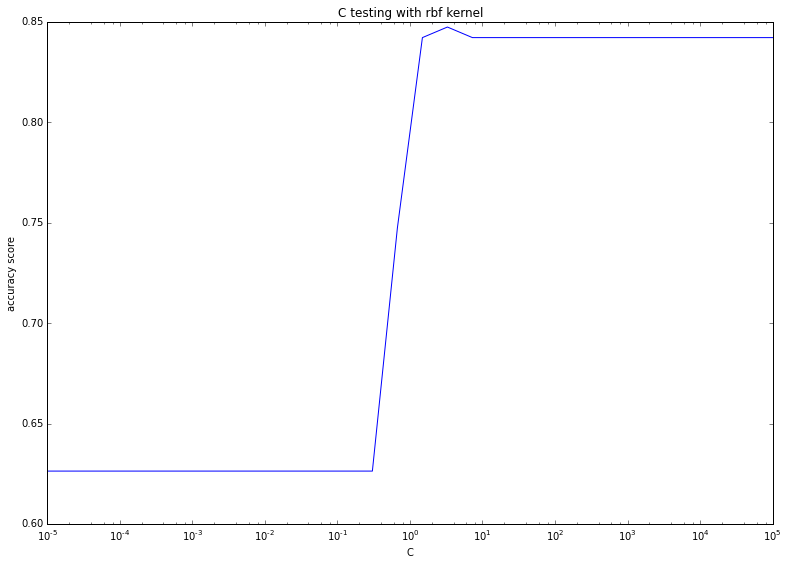

In [13]:
print "score max : ", max(scores)

plt.figure(figsize=(13,9))
plt.semilogx(C_values, scores)
plt.title('C testing with rbf kernel')
plt.xlabel('C')
plt.ylabel('accuracy score')

Un kernel RBF, donne des résultats moins bons que le kernel linéaire.

Si on applique une PCA rondomisée avant la SVM :

In [22]:
n_components = range(10, 1010, 200)
C_values = np.logspace(-7, 7, 20)

all_scores = []
for n in n_components:
    print n
    pca = RandomizedPCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    print np.shape(X_train_pca), np.shape(X_test_pca)
    
    scores = C_testing(X_train_pca, X_test_pca, y_train, y_test, C_values, kernel='rbf')
    all_scores.append(scores)

10
(190, 10) (190, 10)
1.000e-07, 0.647
5.456e-07, 0.647
2.976e-06, 0.647
1.624e-05, 0.647
8.859e-05, 0.647
4.833e-04, 0.647
2.637e-03, 0.647
1.438e-02, 0.647
7.848e-02, 0.647
4.281e-01, 0.684
2.336e+00, 0.658
1.274e+01, 0.663
6.952e+01, 0.684
3.793e+02, 0.684
2.069e+03, 0.684
1.129e+04, 0.684
6.158e+04, 0.684
3.360e+05, 0.684
1.833e+06, 0.684
1.000e+07, 0.684
210
(190, 190) (190, 190)
1.000e-07, 0.647
5.456e-07, 0.647
2.976e-06, 0.647
1.624e-05, 0.647
8.859e-05, 0.647
4.833e-04, 0.647
2.637e-03, 0.647
1.438e-02, 0.647
7.848e-02, 0.647
4.281e-01, 0.647
2.336e+00, 0.647
1.274e+01, 0.647
6.952e+01, 0.647
3.793e+02, 0.647
2.069e+03, 0.647
1.129e+04, 0.647
6.158e+04, 0.647
3.360e+05, 0.647
1.833e+06, 0.647
1.000e+07, 0.647
410
(190, 190) (190, 190)
1.000e-07, 0.647
5.456e-07, 0.647
2.976e-06, 0.647
1.624e-05, 0.647
8.859e-05, 0.647
4.833e-04, 0.647
2.637e-03, 0.647
1.438e-02, 0.647
7.848e-02, 0.647
4.281e-01, 0.647
2.336e+00, 0.647
1.274e+01, 0.647
6.952e+01, 0.647
3.793e+02, 0.647
2.069e+

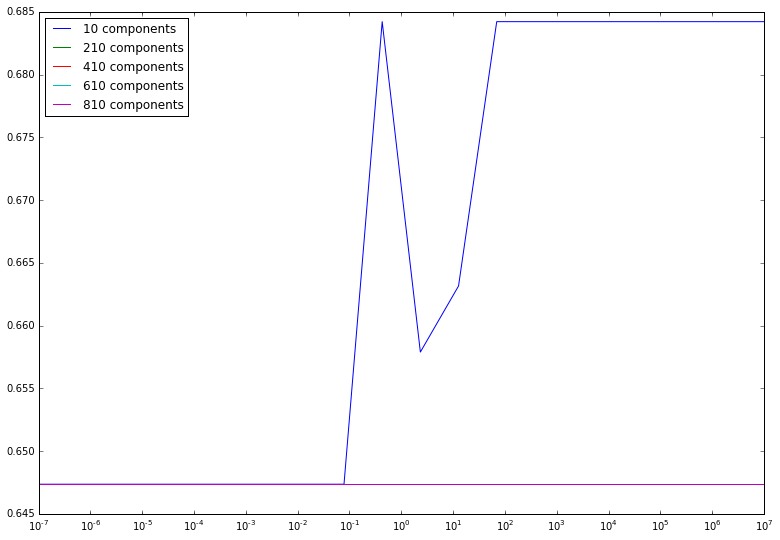

In [23]:
plt.figure(figsize=(13,9))
for i in range(len(all_scores)):
    plt.semilogx(C_values, all_scores[i], label=str(n_components[i])+' components')
    
plt.legend(loc='best')

In [ ]:
pca = RandomizedPCA(whiten=True)
pca.fit(X_train)

var = pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(13,9))
plt.plot(range(np.shape(X_train)[1]), var)

#### Question 9

In [14]:
clf = SVC(kernel='linear', C=1e-3)
clf.fit(X_train, y_train)

print "score : ", clf.score(X_test, y_test)

score :  0.894736842105


[-0.00275077 -0.00258222 -0.0021269  ..., -0.00066616  0.00126138
  0.0027907 ]
0.306308518076


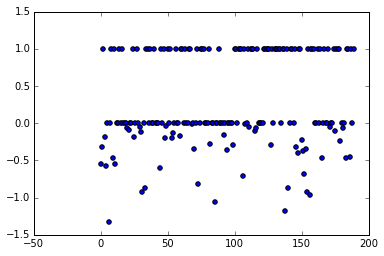

In [29]:
# coeff du problème primale w, w0 
w = clf.coef_[0]
w0 = clf.intercept_[0]

marges = np.asarray([y_train[i]*(np.dot(w, X_train[i,:]) + w0) for i in range(len(X_train))])



print w
print w0

plt.scatter(range(len(X_train)), 1-marges)

In [24]:
# coeff du dual alpha:

alpha = clf.dual_coef_[0]

print np.shape(alpha)
print alpha

(118,)
[ -1.20871257e-04  -2.21089519e-04  -4.84036141e-04  -1.17387108e-04
  -4.19214891e-04  -5.49054591e-05  -4.87300247e-04  -1.81635210e-04
  -5.81601477e-05  -3.82237743e-04  -1.17146737e-05  -1.73487305e-05
  -2.81458485e-04  -5.48087956e-04  -4.34165521e-05  -3.10021965e-04
  -4.12079675e-04  -6.70427203e-04  -4.25539703e-05  -3.11312125e-04
  -1.00000000e-03  -9.72573727e-05  -3.61121426e-04  -3.47763228e-04
  -2.51453499e-04  -1.60292150e-04  -2.49623197e-04  -2.02277771e-04
  -5.38771226e-04  -2.30558961e-04  -1.19606787e-04  -1.10280493e-04
  -1.70080829e-04  -1.01490277e-04  -3.94601167e-05  -5.50266726e-04
  -1.82568733e-04  -1.14487555e-05  -1.13665550e-04  -7.69104843e-05
  -2.65977180e-04  -1.00251830e-04  -1.94675562e-04  -2.90637580e-04
  -7.97162699e-05  -6.08813076e-04  -3.42474835e-04  -1.83197088e-05
  -8.46565297e-05  -2.99047024e-05  -1.67030846e-04  -1.02646507e-04
   7.62923990e-04   3.11112044e-04   2.93706327e-04   2.17806382e-04
   4.20640573e-04   1.15397